# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions you made with groupby and query.

In [1]:
# Import necessary packages and load `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df =pd.read_csv('winequality_edited.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### #1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [2]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

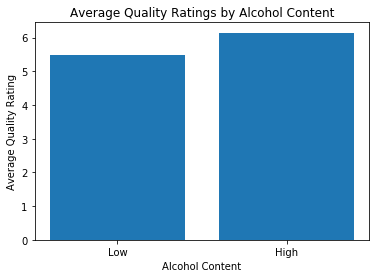

In [3]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [10]:
# Use query to select each group and get its mean quality
med=df.residual_sugar.median()
#print(med)
lower_sugar=df.query('residual_sugar<{}'.format(med))
higher_sugar=df.query('residual_sugar>={}'.format(med))
lower_sugar_mean=lower_sugar['quality'].mean()
higher_sugar_mean=higher_sugar['quality'].mean()
print(lower_sugar_mean)
print(higher_sugar_mean)

5.80880074372
5.82782874618


Text(0,0.5,'Average quality rating')

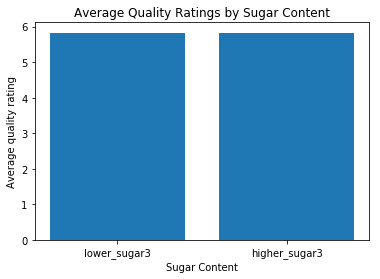

In [13]:
# Create a bar chart with proper labels
positions=[1,2]
labels=['lower_sugar3','higher_sugar3']
values=[lower_sugar_mean,higher_sugar_mean]
plt.bar(positions,values,tick_label=labels)
plt.title('Average Quality Ratings by Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Average quality rating')



### #3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [20]:
# Use groupby to get the mean quality for each acidity level
df.describe()
div_sub=[2.720000,3.110000,3.210000,3.320000,4.010000]
div_levels=['High','Moderately High','Medium','Low']
df['acidic_levels']=pd.cut(df['pH'],div_sub,labels=div_levels)
#df.head()
df.groupby('acidic_levels')['quality'].mean()

acidic_levels
High               5.783343
Moderately High    5.784540
Medium             5.850832
Low                5.859593
Name: quality, dtype: float64

Text(0,0.5,'Average Quality rating')

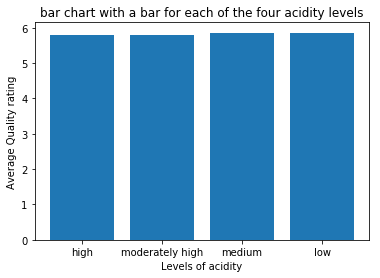

In [22]:
# Create a bar chart with proper labels
positions=[1,2,3,4]
lab=['high','moderately high','medium','low']
values=[5.783343,5.784540,5.850832, 5.859593]
plt.bar(positions,values,tick_label=lab)
plt.title("bar chart with a bar for each of the four acidity levels")
plt.xlabel('Levels of acidity')
plt.ylabel('Average Quality rating')


### Bonus: Create a line plot for the data in #3
You can use pyplot's [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function for this.

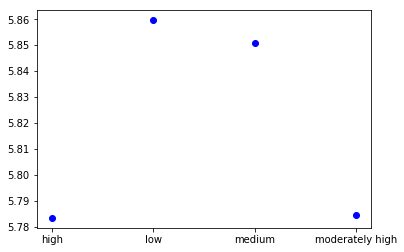

In [24]:
plt.plot(['high','moderately high','medium','low'],[5.783343,5.784540,5.850832, 5.859593],'bo')

Compare this with the bar chart. How might showing this visual instead of the bar chart affect someone's conclusion about this data?